In [104]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg, exp
from scipy.special import gamma
from scipy.optimize import curve_fit

## Expansion in Hilbert Space - Method 1

Gary's Hamiltonian:

$\hat{H} = \sum_j^{L}\Gamma_j\hat{n}_{j}-J\sum_{\langle i,j\rangle}^{L}\hat{a}_{i}^{\dagger}\hat{a}_{j}+\frac{g}{2}\sum_{j}^{L}\hat{n}_{j}(\hat{n}_j - 1)+\frac{1}{2}\sum_{i, j}^{L}\Lambda_{i,j}\hat{n}_{i}\hat{n}_{j}$

Need to expand in Hilbert space for all the interactions of the wells.

In order to expand in Hilbert space, need to calculate tensor product for each of the wells, for an empty well use the identity matrix. Calculate all terms in Hamiltonian. Need to conserve particle number $N$

In [2]:
n = 5
x = range(1, n+1)
x = np.array(x)

Matrix representation of annihilation and creation operators 

$a^\dagger$ = \begin{pmatrix}
0 & 0 & 0 & 0 & \dots & 0 & \dots \\
\sqrt{1} & 0 & 0 & 0 & \dots & 0 & \dots \\
0 & \sqrt{2} & 0 & 0 & \dots & 0 & \dots \\
0 & 0 & \sqrt{3} & 0 & \dots & 0 & \dots \\
\vdots & \vdots & \vdots & \ddots & \ddots & \dots & \dots \\
0 & 0 & 0 & \dots & \sqrt{n} & 0 & \dots & \\
\vdots & \vdots & \vdots & \vdots & \vdots & \ddots & \ddots \end{pmatrix}


$a$ =\begin{pmatrix}
0 & \sqrt{1} & 0 & 0 & \dots & 0 & \dots \\
0 & 0 & \sqrt{2} & 0 & \dots & 0 & \dots \\
0 & 0 & 0 & \sqrt{3} & \dots & 0 & \dots \\
0 & 0 & 0 & 0 & \ddots & \vdots & \dots \\
\vdots & \vdots & \vdots & \vdots & \ddots & \sqrt{n} & \dots \\
0 & 0 & 0 & 0 & \dots & 0 & \ddots \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \ddots \end{pmatrix}

In [3]:
rootx = np.sqrt(x)

In [4]:
a = np.diag(rootx, 1)
adagger = np.transpose(a)
I = np.identity(n+1)

And the number operator is defined by:
$\hat{N}_i=\hat{a}_i^\dagger \hat{a}_i$

In [5]:
#number operator
N = adagger @ a

Expand for all different terms in the Hamiltonian

In [6]:
NN = N @ N
NN_I_1 = np.kron(np.kron(NN,I), I)
NN_I_2 = np.kron(I, np.kron(NN,I))
NN_I_3 = np.kron(I, np.kron(I,NN))

N_1_N_2 = np.kron(np.kron(N, N), I)
N_2_N_3 = np.kron(I, np.kron(N, N))
N_1_N_3 = np.kron(N, np.kron(I,N))

In [7]:
adagger_a1 = np.kron(np.kron(adagger, a), I)
adagger_a2 = np.kron(np.kron(a, adagger), I)
adagger_a3 = np.kron(I, np.kron(adagger, a))
adagger_a4 = np.kron(I, np.kron(a, adagger))

In [8]:
N_sing_1 = np.kron(np.kron(N, I), I)
N_sing_2 = np.kron(I, np.kron(N, I))
N_sing_3 = np.kron(I, np.kron(I, N))

In [9]:
#constants
gammatest = 0
J = 1.0
g = -0.05
d = 1.5
C6 = 100.0
R = 3.0

$\Lambda_{i,j} = C_6/[|i-j|^6 d^6 + R^6]$ is the soft-core interaction between sites $i$ and $j$

In [10]:
def lamda(delta, d, C6, R):
    val = C6 / (((delta)**6)*(d**6) + (R**6))
    return val

In [30]:
#Full Hamiltonian before 1/2 in softcore term is removed
HMTLN_GAR = gammatest*(N_sing_1 - N_sing_3) - J*(adagger_a1 + adagger_a2 + adagger_a3 + adagger_a4) + (g/2)*(NN_I_1 - N_sing_1 + NN_I_2 - N_sing_2 + NN_I_3 - N_sing_3) + (1/2)*(lamda(0,d,C6,R)*(NN_I_1 + NN_I_2 + NN_I_3) + lamda(1,d,C6,R)*(2*N_1_N_2 + 2*N_2_N_3) + lamda(2,d,C6,R)*(2*N_1_N_3))

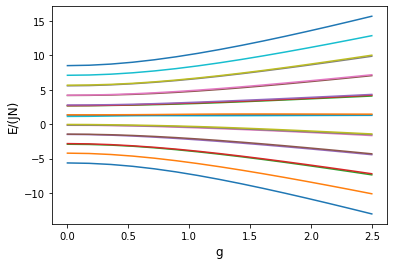

In [198]:
test_array_new = []
gamma_test_new = np.linspace(0, 2.5, 15)
HMTLN_2 = []

n = 5

for vals in gamma_test_new:
    HMTLN_2 = vals*(N_sing_1 -  N_sing_3) - J*(adagger_a1 + adagger_a2 + adagger_a3 + adagger_a4) + (g/2)*(NN_I_1 + NN_I_2 + NN_I_3 - N_sing_1 - N_sing_2 - N_sing_3) + (1/2)*((lamda(0,d,C6,R)*(NN_I_1 + NN_I_2 + NN_I_3)) + (2*lamda(1,d,C6,R)*(N_1_N_2 + N_2_N_3)) + (2*lamda(2,d,C6,R)*(N_1_N_3)))
    total_N = N_sing_1 + N_sing_2 + N_sing_3
    nums = np.diag(total_N.round())
    indices = np.where(nums != n)    
    HMTLN_test = np.delete(np.delete(HMTLN_2, indices, 0), indices, 1)
    
    eigenvals_new = linalg.eigvals(HMTLN_test)
    eigenvals_new = np.sort(eigenvals_new)
    test_array_new.append(eigenvals_new)
    #can normalise eigenvalues
    #newList_1 = [x / n for x in test_array_new]
    
plt.plot(gamma_test_new, test_array_new)
plt.xlabel('g', fontsize = '12')
plt.ylabel('E/(JN)', fontsize = '12')
plt.show()

## Method 2 for expansion in Hilbert space 

Before you expand in all Hilbert space and then delete matrix elements that do not conserve $N$. Here, you only calculate the matrix values which conserve particle number

In [13]:
Ls = 3
Na = 5

In [14]:
#All permutations of triple-well system when N = Na

def sums(length, total_sum):
    if length == 1:
        yield (total_sum,)
    else:
        for value in range(total_sum + 1):
            for permutation in sums(length - 1, total_sum - value):
                yield (value,) + permutation

L = list(sums(Ls, Na))
print('total permutations:',len(L))

total permutations: 21


In [15]:
#redefine variables
Hbs = L
lH = len(L)

In [16]:
##Non Universal - checking error - only for triple well
#Hopping term from Hamiltonian

def ApAm(m, Hb, Na, lH, array):
    for j in range(0,lH):
        if Hb[j][m] < Na and Hb[j][m+1] > 0:
            a = Hb[j][m] + 1
            b = Hb[j][m+1] - 1
            if m == 0:
                new_ind = Hb.index(((a), (b), (Na - (a+b))))
            elif m == 1:
                new_ind = Hb.index(((Na - (a+b)), (a), (b)))
            array[j][new_ind] += np.sqrt((Hb[j][m]+1)*(Hb[j][m+1]))

In [17]:
#onsite interaction
def HGaronsite(Hb, g, arr, lH):
    for j in range(0, lH):
        for k in range(0, lH):
            if j == k:
                full_sum = Hb[j][0]**2 + Hb[j][1]**2 + Hb[j][2]**2 - Hb[j][0] - Hb[j][1] - Hb[j][2]
                arr[j][k] += full_sum

In [18]:
#tilt interaction
def HGartit(Hb, gamma, arr, lH):
    for j in range(0, lH):
        for k in range(0, lH):
            if j == k:
                full_sum_5 = gamma*Hb[j][0]- gamma*Hb[j][2]
                arr[j][k] += full_sum_5

In [19]:
#soft-core interaction - before 1/2 in Hamiltonian has been changed
def HGarSoftCore(Hb, arr, d, C6, R, lH):
    for j in range(0, lH):
        for k in range(0, lH):
            if j == k:
                full_sum_2 = lamda(0,d,C6,R)*(Hb[j][0]*Hb[j][0]+Hb[j][1]*Hb[j][1]+Hb[j][2]*Hb[j][2]) + 2*lamda(1,d,C6,R)*(Hb[j][0]*Hb[j][1]+Hb[j][1]*Hb[j][2]) + 2*lamda(2,d,C6,R)*(Hb[j][0]*Hb[j][2])
                arr[j][k] += full_sum_2

In [20]:
#all variables
gamma = np.linspace(0, 2.5, 20)
J = 1.0
g = -0.05
d = 1.5
C6 = 100.0
R = 3.0

In [21]:
Honsite = np.zeros(shape = (lH, lH))
HSoftCore = np.zeros(shape = (lH, lH))
HHop = np.zeros(shape = (lH, lH))

ApAm(0, Hbs, Na, lH, HHop)
ApAm(1, Hbs, Na, lH, HHop)

transp = np.transpose(HHop)
HFull = HHop + transp

HGaronsite(Hbs, g, Honsite, lH)
HGarSoftCore(Hbs, HSoftCore, d, C6, R, lH)

full_eig = []
for gammas in gamma:
    Htit = np.zeros(shape = (lH, lH))
    HGartit(Hbs, gammas, Htit, lH)
    Htot = Htit - (J*HFull) + (g/2)*(Honsite) + (1/2)*(HSoftCore)
    full_eig.append(np.sort(linalg.eigvals(Htot)))

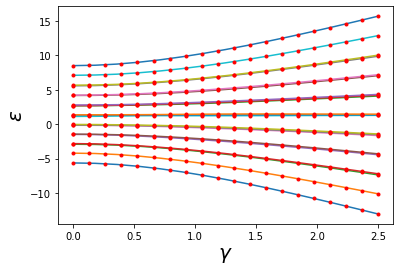

In [36]:
#Checking both methods produce the same results
plt.plot(gamma_test_new, test_array_new)
plt.plot(gamma, full_eig, 'r.')
plt.xlabel(r'$\gamma$', fontsize = 20)
plt.ylabel(r'$\epsilon$', fontsize = 20)
plt.show()

## Level Statistics

The transition to quantum chaos can be characterised by probing the distribution $P(s)$ of the spacings $s$ between nearest unfolded energy levels. 

Integrable systems - $P_p(s) = e^{-s}$ - Poisson distribution

Chaotic - $P_{WD}(s) = \frac{\pi s}{2}e^{-\pi s^2/4}$ - Wigner-Dyson distribution

In [95]:
##Change value of N

Na1 = 50
L1 = list(sums(Ls, Na1))
print('total permutations:',len(L1))

#redefine variables
Hbs1 = L1
lH1 = len(L1)

total permutations: 1326


In [96]:
Honsite = np.zeros(shape = (lH1, lH1))
HSoftCore = np.zeros(shape = (lH1, lH1))
HHop = np.zeros(shape = (lH1, lH1))

ApAm(0, Hbs1, Na1, lH1, HHop)
ApAm(1, Hbs1, Na1, lH1, HHop)

transp = np.transpose(HHop)
HFull = HHop + transp

HGaronsite(Hbs1, g, Honsite, lH1)
HGarSoftCore(Hbs1, HSoftCore, d, C6, R, lH1)

Htit = np.zeros(shape = (lH1, lH1))
HGartit(Hbs1, 0, Htit, lH1)
Htotlevstat = Htit - (J*HFull) + (g/2)*(Honsite) + (1/2)*(HSoftCore)
eigenvals_newlevstat = np.sort(linalg.eigvals(Htotlevstat))
diff_listlevstat = [(eigenvals_newlevstat[i] - eigenvals_newlevstat[i-1]) for i in range(1, len(eigenvals_newlevstat))]

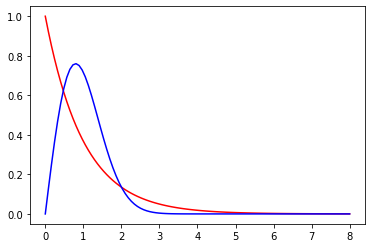

In [97]:
#red - poisson, blue-WD
s = np.linspace(0, 8, 100)
poisson = np.exp(-s)
wigner = ((np.pi * s)/2) * np.exp((-np.pi * s**2)/4)
plt.plot(s, poisson, 'r-')
plt.plot(s, wigner, 'b-')
plt.show()

## Unfolding procedure 

Requires local re-scaling of the energies so the mean level spacing is equal to one. Essentially this is achieved by dividing the spacings between neighbouring energy levels by the average of spacings in their vicinity.

$P(s) = \frac{E_{i+1} - E{i}}{\Delta (E)}$

Ask Tianyi for more details - 

https://iopscience-iop-org.nottingham.idm.oclc.org/article/10.1088/0022-3700/15/23/012/pdf

Equations 7 and 8

In [98]:
diff_list = [(eigenvals_newlevstat[i] - eigenvals_newlevstat[i-1]) for i in range(1, len(eigenvals_newlevstat))]

In [99]:
v = 5
index1 = int((v-1)/2)-1
index2 = len(diff_list)-index1-1
diffs_dropped = diff_list[index1:index2]

In [100]:
def avg_spacing(differences, i, v):
    drop_index = int((v-1)/2)
    assert i-index1 > 0
    assert i+index1 <= len(differences)
    sums = 0
    for k in range(-drop_index,drop_index+1):
        sums += differences[(i+k)-1]
    return sums/v

In [101]:
new_diffs = []
v = 5
for i in range(len(diffs_dropped)):
    drop_index = int((v-1)/2)
    if i-drop_index > 0 and i+drop_index <= len(diffs_dropped):
        new_diffs.append(diffs_dropped[i-1]/avg_spacing(diffs_dropped, i, v))

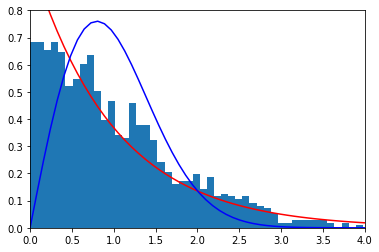

In [102]:
plt.hist(new_diffs, bins = 50, density=True)
plt.plot(s, poisson, 'r-')
plt.plot(s, wigner, 'b-')
plt.xlim(0,4)
plt.ylim(0,0.8)
plt.show()

## Brody Distribution

Proximity of level spacings to Poisson or Wigner distribution can be quantified using a chaos indicator $\beta$, obtained by fitting the Brody distribution to the level statistics above:

\begin{equation}
P_\beta (s) = (\beta+1) b s^{\beta} \exp(-b s^{\beta+1}), \hspace{0.4 cm} 
b =\left[ \Gamma \left( \frac{\beta+2}{\beta+1} \right) \right]^{\beta+1}
\label{Eq:beta}
\end{equation}

For chaotic systems, $\beta \sim 1$ and for a Poissonian distribution, $\beta \sim 0$.

Where $b$ is a factor dependent on $\beta$, and $\Gamma(x)$ is the gamma function.

In [106]:
#coding equation
beta = 0
gammafun = (gamma((beta+2)/(beta+1)))
b = gammafun**(beta+1)
brody1 = (beta + 1)*b*(s**beta)*exp(-b*(s**(beta+1)))

In [108]:
def brody(s, beta):
    return (beta + 1)*b*(s**beta)*exp(-b*(s**(beta+1)))

In [117]:
#Using this function as it works - could potentially use something else
(n, bins1, patches) = plt.hist(new_diffs, bins = 'auto', density = True)
plt.clf()
data_entries1 = n
bincenters1 = np.array([0.5 * (bins1[i] + bins1[i+1]) for i in range(len(bins1)-1)])
print(len(data_entries1), len(bincenters1))

22 22


<Figure size 432x288 with 0 Axes>

In [119]:
#Fit curve to level statistics
popt, pcov = curve_fit(brody, xdata=bincenters1, ydata=data_entries1)

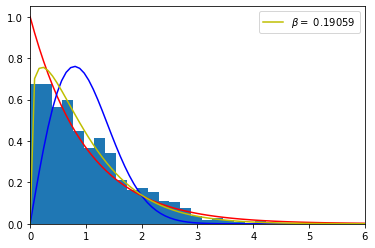

In [122]:
#Plot chaos indicator on plot to see if its working
plt.hist(new_diffs, bins = 'auto', density = True)
plt.plot(s, poisson, 'r-')
plt.plot(s, wigner, 'b-')
data = brody(s, popt)
plt.plot(s, data, 'y-', label = r'$\beta =$ %.5f' %(popt))
plt.xlim(0,6)
plt.legend()
plt.show()

## Plot of $\beta$ for varying $\gamma$

In [123]:
gammavals = np.linspace(0, 5, 50)

In [124]:
#Could definitely produce function to calculate hamiltonian each time - as Tianyi did - this works for me and with limited time
# I have kept it

#Calculation of the chaos indicator for different gamma values

Honsite = np.zeros(shape = (lH1, lH1))
HSoftCore = np.zeros(shape = (lH1, lH1))
HHop = np.zeros(shape = (lH1, lH1))
ApAm(0, Hbs1, Na1, lH1, HHop)
ApAm(1, Hbs1, Na1, lH1, HHop)

transp = np.transpose(HHop)
HFull = HHop + transp

HGaronsite(Hbs1, g, Honsite, lH1)
HGarSoftCore(Hbs1, HSoftCore, d, C6, R, lH1)

betas = []
for gammas in gammavals:
    Htit = np.zeros(shape = (lH1, lH1))
    HGartit(Hbs1, gammas, Htit, lH1)
    Htot = Htit - (J*HFull) + (g/2)*(Honsite) + (1/2)*(HSoftCore)
    eigenvals_newtest = linalg.eigvals(Htot)
    eigenvals_newtest = np.sort(eigenvals_newtest) 
    diff_listtest = [(eigenvals_newtest[i] - eigenvals_newtest[i-1]) for i in range(1, len(eigenvals_newtest))]
    v = 5
    index11 = int((v-1)/2)-1
    index21 = len(diff_listtest)-index11-1
    diffs_dropped1 = diff_listtest[index11:index21]
    new_diffstest = []
    for i in range(len(diffs_dropped1)):
        drop_index = int((v-1)/2)
        if i-drop_index > 0 and i+drop_index <= len(diffs_dropped1):
            new_diffstest.append(diffs_dropped1[i-1]/avg_spacing(diffs_dropped1, i, v))
    (ntest, binstest, patches) = plt.hist(new_diffstest, bins = 'auto', density = True)
    plt.clf()
    data_entriestest = ntest
    bincenterstest = np.array([0.5 * (binstest[i] + binstest[i+1]) for i in range(len(binstest)-1)])
    poptest, pcov = curve_fit(brody, xdata=bincenterstest, ydata=data_entriestest)
    betas.append(poptest)

<Figure size 432x288 with 0 Axes>

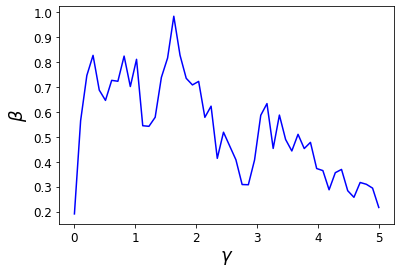

In [127]:
##Higher values of the chaos indicator mean higher signs of quantum chaos
plt.plot(gammavals, betas, 'b')
plt.xlabel(r'$\gamma$', fontsize = 18)
plt.ylabel(r'$\beta$', fontsize = 18)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

## Did a similar investigation as above but for varying the onsite interaction $g$. Won't put the code here as its in essence the same but these are the results for N = 50 - but found a maximum value of the quantum chaos for an onsite interaction of -0.05

In [128]:
##Testing results - for different gammas

for i in range(len(gammavals)):
    print(gammavals[i], betas[i])

0.0 [0.19058994]
0.10204081632653061 [0.56477014]
0.20408163265306123 [0.74589051]
0.30612244897959184 [0.82661602]
0.40816326530612246 [0.68724592]
0.5102040816326531 [0.64598569]
0.6122448979591837 [0.72636821]
0.7142857142857143 [0.72269158]
0.8163265306122449 [0.8236623]
0.9183673469387755 [0.70157456]
1.0204081632653061 [0.81069498]
1.1224489795918369 [0.54435688]
1.2244897959183674 [0.54194402]
1.3265306122448979 [0.57817454]
1.4285714285714286 [0.73815727]
1.5306122448979593 [0.81609617]
1.6326530612244898 [0.98349662]
1.7346938775510203 [0.82728032]
1.836734693877551 [0.73445185]
1.9387755102040818 [0.70802266]
2.0408163265306123 [0.72217055]
2.142857142857143 [0.5780155]
2.2448979591836737 [0.6227758]
2.3469387755102042 [0.41347119]
2.4489795918367347 [0.51835798]
2.5510204081632653 [0.46293972]
2.6530612244897958 [0.40773951]
2.7551020408163267 [0.30847507]
2.857142857142857 [0.30758899]
2.9591836734693877 [0.40694579]
3.0612244897959187 [0.58625654]
3.163265306122449 [0.6331

In [130]:
## e.g. for extreme chaos
gammaval = 1.63
Honsite = np.zeros(shape = (lH1, lH1))
HSoftCore = np.zeros(shape = (lH1, lH1))
HHop = np.zeros(shape = (lH1, lH1))

ApAm(0, Hbs1, Na1, lH1, HHop)
ApAm(1, Hbs1, Na1, lH1, HHop)

transp = np.transpose(HHop)
HFull = HHop + transp

HGaronsite(Hbs1, g, Honsite, lH1)
HGarSoftCore(Hbs1, HSoftCore, d, C6, R, lH1)

Htit = np.zeros(shape = (lH1, lH1))
HGartit(Hbs1, gammaval, Htit, lH1)
Htotcheck = Htit - (J*HFull) + (g/2)*(Honsite) + (1/2)*(HSoftCore)
eigenvals_check = np.sort(linalg.eigvals(Htotcheck))
diff_listcheck = [(eigenvals_check[i] - eigenvals_check[i-1]) for i in range(1, len(eigenvals_check))]

In [131]:
v = 5
index15 = int((v-1)/2)-1
index25 = len(diff_listcheck)-index15-1
diffs_droppedcheck = diff_listcheck[index15:index25]

In [132]:
new_diffscheck = []
v = 5
for i in range(len(diffs_droppedcheck)):
    drop_index = int((v-1)/2)
    if i-drop_index > 0 and i+drop_index <= len(diffs_droppedcheck):
        new_diffscheck.append(diffs_droppedcheck[i-1]/avg_spacing(diffs_droppedcheck, i, v))

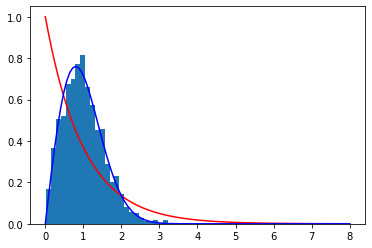

In [134]:
plt.hist(new_diffscheck, bins = 'auto', density = True)
plt.plot(s, poisson, 'r-')
plt.plot(s, wigner, 'b-')
plt.show()

## Static Shannon Entropy

The Shannon entropy, $Sh$, of an eigenstate written in the Fock basis is calculated as a function of energy using the following:

$Sh \equiv -\sum_{m=1}^D  |C^{m}_j|^2 \ln |C^{m}_j|^2$

where $C^{m}_j$ are the corresponding eigenvectors of the system, summing from $m = 1$ to $D$, the dimension in Hilbert space.

This entropy measures the degree of delocalisation of the eigenstates in a given basis

As the system transitions into the chaotic regime, eigenstates near the centre of the spectrum are expected to form closer to the eigenstates of the GOE full random matrices.

The eigenstates of the GOE random matrices are mathematically equivalent and hence lead to around the same value of the Shannon entropy, $Sh_{GOE} \sim \ln(0.48 D)$

In [135]:
Ls2 = 3
Na2 = 50

In [136]:
L2 = list(sums(Ls2, Na2))
print('total permutations:',len(L2))

total permutations: 1326


In [137]:
lH2 = len(L2)
Hbs2 = L2

In [201]:
##Adjust gamma value here, for linear behaviour the plot should be spread in Hilbert space
# For chaos - region should be less spread and close to GOE matrices
gam = 1.63

In [202]:
Honsite = np.zeros(shape = (lH2, lH2))
HSoftCore = np.zeros(shape = (lH2, lH2))
HHop = np.zeros(shape = (lH2, lH2))

ApAm(0, Hbs2, Na2, lH2, HHop)
ApAm(1, Hbs2, Na2, lH2, HHop)

transp = np.transpose(HHop)
HFull = HHop + transp

HGaronsite(Hbs2, g, Honsite, lH2)
HGarSoftCore(Hbs2, HSoftCore, d, C6, R, lH2)

Htit = np.zeros(shape = (lH2, lH2))
HGartit(Hbs2, gam, Htit, lH2)
Htotsha = Htit - (J*HFull) + (g/2)*(Honsite) + (1/2)*(HSoftCore)
eigenvals_newsha, eigenvecs_newsha = np.linalg.eig(Htotsha)

In [203]:
D = np.log(0.48*len(eigenvals_newsha))

In [204]:
shannon1 = []
for i in range(len(eigenvals_newsha)):
    val = (eigenvecs_newsha[:, i]**2)
    ent = -((val)*np.log(val))
    shannon1.append(ent)

In [205]:
##manipulated array values - could do it differently 
full_shannon = []
for i in range(len(eigenvals_newsha)):
    full_shannon.append([eigenvals_newsha[i], sum(shannon1[i])])

In [206]:
ener = [i[0]/Na2 for i in full_shannon]
shan = [i[1]/D for i in full_shannon]

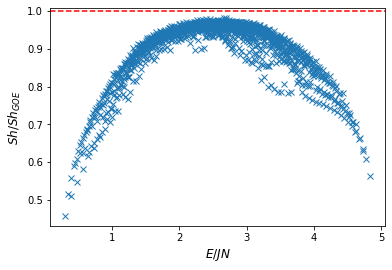

In [207]:
plt.plot(ener, shan, 'x')
plt.axhline(y=1, color='r', linestyle='--')
plt.xlabel(r'$E/JN$', fontsize = 12)
plt.ylabel(r'$Sh/Sh_{GOE}$', fontsize = 12)
plt.show()

## Dynamic Shannon entropy

It is also possible to study the dynamics of the chaotic behaviour by considering the evolution of the Shannon entropy over time $t$. Considering an initial state written in the Fock basis: $|\psi(0) \rangle = \sum_{m} a_m|m\rangle$with $|a_m| < 1$ and $\sum_{m} |a_m|^2$, it is possible to calculate the time dependent state at time $t$:

        
$|\psi(t) \rangle =  \sum_{j} e^{-iE_j t} P_j |\psi_j \rangle$
where $P_j = \langle \psi_j | \psi(0) \rangle = \sum_{m}(C_j^m)^* a_m$. 

$C_j^m$ is once again the eigenvectors of the system, $a_m$ here corresponds to the eigenvectors of the ground state, and $|m \rangle$ is the Fock state. Expressing the time dependent state using the Fock basis leads to the following expression:

$|\psi(t) \rangle = \sum_{m} (\sum_{j} P_j e^{-iE_j t} C_j^m) |m \rangle = \sum_{m} \alpha_m |m \rangle$

Where the term in the brackets can be attributed to a new value $\alpha_m$, which is time dependent. The Shannon entropy can now be calculated at any $t$ using the equation: $Sh(t) = \sum_{m}  |\alpha_m|^2 \ln |\alpha_m|^2$.

In [156]:
Lsdyn = 3
Ndyn = 50

In [157]:
Ldyn = list(sums(Lsdyn, Ndyn))
print('total permutations:',len(Ldyn))

total permutations: 1326


In [188]:
Lint = Ldyn
Lintlen = len(Ldyn)

#Adjust gamma here
gammaint = 1.63

In [189]:
Honsite = np.zeros(shape = (Lintlen, Lintlen))
HSoftCore = np.zeros(shape = (Lintlen, Lintlen))
HHop = np.zeros(shape = (Lintlen, Lintlen))

ApAm(0, Lint, Ndyn, Lintlen, HHop)
ApAm(1, Lint, Ndyn, Lintlen, HHop)

transp = np.transpose(HHop)
HFull = HHop + transp

HGaronsite(Lint, g, Honsite, Lintlen)
HGarSoftCore(Lint, HSoftCore, d, C6, R, Lintlen)

Htit = np.zeros(shape = (Lintlen, Lintlen))
HGartit(Lint, gammaint, Htit, Lintlen)
Htotdyn = Htit - (J*HFull) + (g/2)*(Honsite) + (1/2)*(HSoftCore)
eigenvals_dyn, eigenvecs_dyn = linalg.eig(Htotdyn)

In [172]:
def alpha(m, t, eigv, eigvc):
    #initial state
    ind = Ldyn.index((20,10,20))
    Cvec = eigvc[m, :]
    alpha = 0
    for j in range(len(Cvec)):
        pj = np.conj(eigvc[ind, j])
        E_j = eigv[j]
        alpha += pj*np.exp(-1j*E_j*t)*Cvec[j]
    return alpha

In [173]:
def SB(t, eigv, eigvc):
    SB = 0
    for i in range(len(eigv)):
        alpham = alpha(i, t, eigv, eigvc)
        a = alpham * np.conj(alpham)
        SB += -a * np.log(a)
    return SB

## Experiment with value of very strong quantum chaos and one with strong linear behaviour

Linear - 5

Chaos - 1.63

For chaos, the value of the Shannon entropy should reach a higher peak

In [185]:
ts = np.linspace(0, 10, 10)
SBs_5 = np.zeros(shape = len(ts))
for i in range(len(ts)):
    SBs_5[i] = SB(ts[i], eigenvals_dyn, eigenvecs_dyn)

C:\Users\mattc\anaconda3\lib\site-packages\ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


In [190]:
SBs_163 = np.zeros(shape = len(ts))
for i in range(len(ts)):
    SBs_163[i] = SB(ts[i], eigenvals_dyn, eigenvecs_dyn)

C:\Users\mattc\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


In [192]:
norm_SBs_5 = SBs_5/np.log(len(eigenvals_dyn))
norm_SBs_163 = SBs_163/np.log(len(eigenvals_dyn))

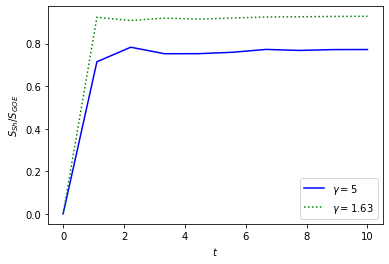

In [193]:
plt.plot(ts, norm_SBs_5, 'b-', label = r'$\gamma = 5$')
plt.plot(ts, norm_SBs_163, 'g:', label = r'$\gamma = 1.63$')

plt.ylabel(r'$S_{Sh}/S_{GOE}$')
plt.xlabel(r'$t$')
plt.legend()

## Plot average value when it reaches equilibrium over different gammas

In [196]:
##slow code - could do this better

gammas = np.linspace(0, 10, 11)
ts1 = np.linspace(0, 5, 10)
SBs1 = np.zeros(shape = len(ts1))
aveEEs = []

for i in range(len(gammas)):
    gamma = gammas[i]
    
    Honsite = np.zeros(shape = (Lintlen, Lintlen))
    HSoftCore = np.zeros(shape = (Lintlen, Lintlen))
    HHop = np.zeros(shape = (Lintlen, Lintlen))
    ApAm(0, Lint, Ndyn, Lintlen, HHop)
    ApAm(1, Lint, Ndyn, Lintlen, HHop)
    transp = np.transpose(HHop)
    HFull = HHop + transp
    HGaronsite(Lint, g, Honsite, Lintlen)
    HGarSoftCore(Lint, HSoftCore, d, C6, R, Lintlen)
    Htit = np.zeros(shape = (Lintlen, Lintlen))
    HGartit(Lint, gamma, Htit, Lintlen)
    Htotdyn = Htit - (J*HFull) + (g/2)*(Honsite) + (1/2)*(HSoftCore)
    eigenvals_dyn, eigenvecs_dyn = linalg.eig(Htotdyn)

    for i in range(len(ts1)):
        SBs1[i] = SB(ts1[i], eigenvals_dyn, eigenvecs_dyn)
    
    SBs1 = SBs1/np.log(len(eigenvals_dyn))
    drop_rate = 0.2
    norm_len = len(SBs1)
    left_num = int(np.floor(drop_rate*norm_len))
    aveEEs.append(np.mean(SBs1[left_num:norm_len]))

C:\Users\mattc\anaconda3\lib\site-packages\ipykernel_launcher.py:26: ComplexWarning: Casting complex values to real discards the imaginary part


KeyboardInterrupt: 

In [ ]:
plt.plot(gammas, aveEEs, 'b.', markersize=10)
plt.ylabel(r'$\bar{S}_{Sh}/S_{GOE}$', fontsize = 18)
plt.xlabel(r'$\gamma$', fontsize = 18)

## Evolution of particle number in each of the wells

This is adapted from Tianyi's code so ask for more details. Done in conjungtion to the entanglement entropy which he calculated

Very slow so used a plot from him which he can share with you 

In [186]:
def evolution_number(H, init, basis, site, ts):
    num_site = len(basis[0])
    assert site >= 1 & site <= num_site
    
    vals, vecs = linalg.eig(H)    
    m = basis.index(init)
    len_vals = len(vals)
    
    ns = []
    for t in ts: 
        n = 0 # This will be the expectation value of number of the site
        for m2 in range(len_vals):
            n_i = basis[m2][site]
            prod_1 = 0
            prod_2 = 0
            for j in range(len_vals):
                prod_1 += vecs[m,j]*exp(1j*vals[j]*t)*np.conj(vecs[m2,j])
                prod_2 += vecs[m,j]*exp(-1j*vals[j]*t)*np.conj(vecs[m2,j])
            n += prod_1*prod_2*n_i
        ns.append(n)
    return ns

In [187]:
ts2 = np.linspace(0, 100, 5)

In [ ]:
##Very slow
evol_num41 = evolution_number(H=Htotdyn1, init=(0, 0, 60), basis=Lint1, site=0, ts=(ts2))
evol_num42 = evolution_number(H=Htotdyn1, init=(0, 0, 60), basis=Lint1, site=1, ts=(ts2))
evol_num43 = evolution_number(H=Htotdyn1, init=(0, 0, 60), basis=Lint1, site=2, ts=(ts2));